In [13]:
import pandas as pd
import numpy as np
from scipy import stats

%reload_ext nb_black
from matplotlib import pyplot as plt
import plotly
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
%reload_ext nb_black
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM studentsperformance
"""
df = pd.read_sql_query(query, con=conn_str)

# I don't like the column names bc I can't use my column methods
mapping = {
    "parental level of education": "parent_education",
    "test preparation course": "test_prep",
    "math score": "math",
    "reading score": "reading",
    "writing score": "writing",
}
df = df.rename(columns=mapping)
df.head()

,gender,race/ethnicity,parent_education,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [15]:
for var in ["math", "reading", "writing"]:
    print(var)
    print("Jarque-Bera")
    print(stats.jarque_bera(df[var]))
    print("Normal Test")
    print(stats.normaltest(df[var]))
    print("--------------------------------------------------------------------")

math
Jarque-Bera
Jarque_beraResult(statistic=15.912256686712709, pvalue=0.0003505075386818213)
Normal Test
NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)
--------------------------------------------------------------------
reading
Jarque-Bera
Jarque_beraResult(statistic=11.383300575987892, pvalue=0.0033740202672214448)
Normal Test
NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
--------------------------------------------------------------------
writing
Jarque-Bera
Jarque_beraResult(statistic=13.98509448257235, pvalue=0.0009187033894586527)
Normal Test
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)
--------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> none of the distributions are normal
---

# Say you want to use a single variable for the exam scores as your target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [17]:
df["score_avg"] = (df.math + df.reading + df.writing) / 3
stats.normaltest(df.score_avg)

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> new variable not normally distributed
---

In [27]:
score_avg_boxcox, _ = stats.boxcox(df.score_avg)
stats.normaltest(score_avg_boxcox)

NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> the new distribution is normal
---

# Which variables seem related to the target variable (the newly created variable from the previous question)? If your goal is to explain the determinants of success in exams, which variables in your dataset might be useful?

In [31]:
df.head()

,gender,race/ethnicity,parent_education,lunch,test_prep,math,reading,writing,score_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

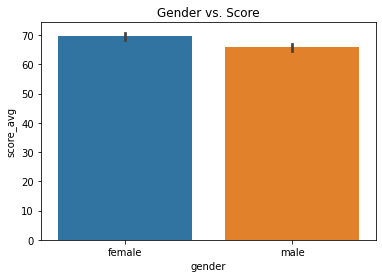

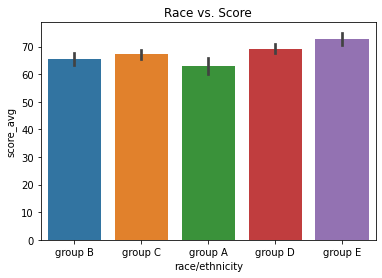

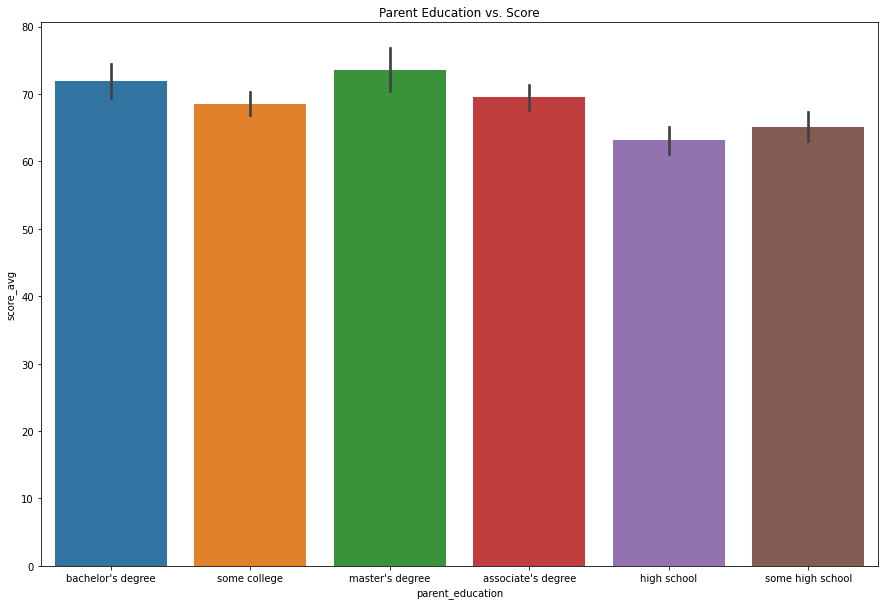

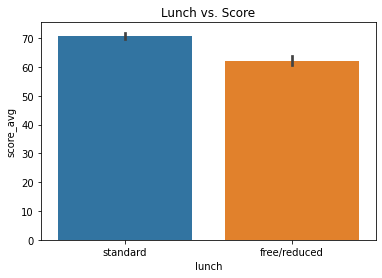

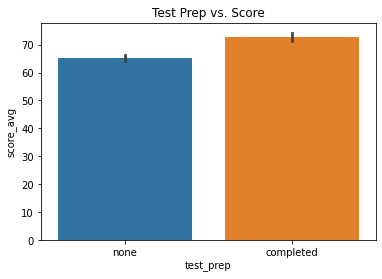

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
plt.title("Gender vs. Score")
sns.barplot(df.gender, df.score_avg)
plt.show()

plt.title("Race vs. Score")
sns.barplot(df["race/ethnicity"], df.score_avg)
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Parent Education vs. Score")
sns.barplot(df.parent_education, df.score_avg)
plt.show()

plt.title("Lunch vs. Score")
sns.barplot(df.lunch, df.score_avg)
plt.show()

plt.title("Test Prep vs. Score")
sns.barplot(df.test_prep, df.score_avg)
plt.show()

> Variables of Interest:
1. gender, test prep, and lunch all show a decent indication of score differences
2. parental education shows some differences between the high school values and the others
3. Race shows some differences between a few of the groups
---